In [41]:
#회귀
import matplotlib.pyplot as plt
from random import *
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
# ~Classfier 분류 모델  ~Regressor 회귀모델

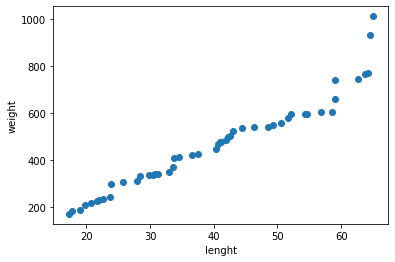

In [56]:
perch_length = [round(random(),2)*10 + 10 + i  for i in range(1,50)]
perch_length.sort()
perch_weight = [randint(50,100) * randint(1,10) + i for i in perch_length]
perch_weight.sort()

perch_length = np.array(perch_length)
perch_weight = np.array(perch_weight)

plt.scatter(perch_length,perch_weight)

plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [57]:
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print('train_input : ',train_input)
print('test_input : ',test_input)

train_input :  [[23.7]
 [19.8]
 [22. ]
 [56.8]
 [58.6]
 [64.2]
 [30.8]
 [23.9]
 [31.2]
 [40.6]
 [48.6]
 [43. ]
 [17.2]
 [59.1]
 [46.4]
 [21.6]
 [42.5]
 [28. ]
 [51.6]
 [17.8]
 [36.6]
 [19. ]
 [52.2]
 [50.5]
 [40.4]
 [54.6]
 [25.7]
 [37.5]
 [33.6]
 [65. ]
 [34.6]
 [22.6]
 [59. ]
 [30.4]
 [42.2]
 [54.3]]
test_input :  [[29.8]
 [63.8]
 [64.5]
 [62.6]
 [32.9]
 [41.9]
 [41.1]
 [41. ]
 [44.4]
 [33.7]
 [28.4]
 [20.8]
 [49.3]]


In [58]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

result = knr.score(test_input,test_target)
print('result : ',result)

from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
# 평균적으로 얼마나 차이가 나는지
print('mae : ',mae)

result :  0.932267674254075
mae :  24.401538461538454


In [59]:
# 과대적합 과 과소 적합
train = knr.score(train_input,train_target)
print('train : ',train)
test = knr.score(test_input,test_target)
print('test : ',test)

train :  0.9323407455565619
test :  0.932267674254075


train :  0.962743948569968
test :  0.9471732778373109
try_test :  841.4


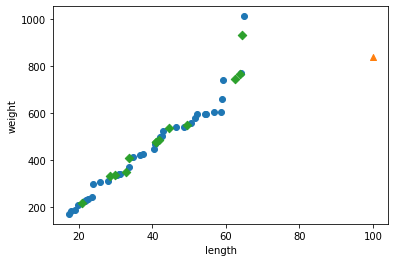

In [80]:
#  이웃 개수가 적어지면 과대 적합   많아지면 과소적합
knr.n_neighbors = 3
knr.fit(train_input,train_target)

train = knr.score(train_input,train_target)
print('train : ',train)
test = knr.score(test_input,test_target)
print('test : ',test)

[try_test] = knr.predict([[100]])
print('try_test : ',try_test) 

plt.scatter(train_input,train_target)
plt.scatter(100,try_test,marker='^')
plt.scatter(test_input,test_target,marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 트레이닝 범위를 벋어나면 이상한 값을 가지게 된다. 
# 이유는 가장 가까운 값의 평균이기 때문에 트레이닝된 범위 에서만 사용 가능한 알고리즘이다. 

# 선형 회귀

LinearRegression

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회기 모델 훈련
lr.fit(train_input,train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))
#      기울기  ,    y절편
# 농어무게 = 기울기(a) * 농어길이 + 절편(b)
print(lr.coef_,lr.intercept_)

[585.3468368]
[12.67744961] -48.52564351357222


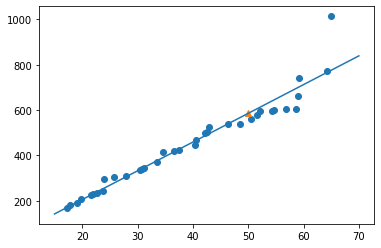

0.9351413549456755
0.9392406779725421


In [86]:
# 학습한 직선 그리기

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input,train_target)

# 15 에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15,70],[15*lr.coef_ + lr.intercept_,70*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,585.3,marker='^')
plt.show()

print(lr.score(train_input,train_target))

print(lr.score(test_input,test_target))

In [102]:
# 다항 회귀

# 무게 = 기울기(제곱된 길이의 기울기) * 길이**2 + 기울기 * 길이 + 절편
# lr = LinearRegression()
train_poly = np.column_stack((train_input ** 2,train_input))
test_poly = np.column_stack((test_input ** 2 ,test_input))

lr.fit(train_poly,train_target)

print(lr.predict([[50**2 , 50]]))

print(lr.coef_,lr.intercept_)
# 무게 = 0.07 * 길이**2 - 6.69 * 길이 + 55.47

[577.1346916]
[0.07482753 6.69184789] 55.473480937016404


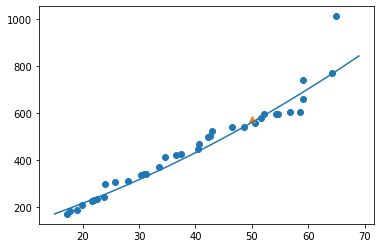

0.9402017586876321
0.9497489956820524


In [111]:
# 학습한 직선 그리기

# 구간별 직선을 그리기 위해 15에서 49까지  정수 배열을 만든다.
point = np.arange(15,70)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input,train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point,  0.07 * point**2 + 6.6 * point + 55.4)

# 50cm 농어 데이터 
plt.scatter([50],[577.13],marker='^')
plt.show()

print(lr.score(train_poly,train_target))

print(lr.score(test_poly,test_target))

# 특성 공학 과 규제

In [112]:
# 다중 회귀  multiple regression
#  판다스로 데이터 준비 - 데이터 프레임 DataFrame

import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)
# 길이 높이 두께

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [115]:
# 다항 특성 만들기 
from sklearn.preprocessing import PolynomialFeatures

# degree =2
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2,3,2**2,2*3,3**2
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [117]:
# LinearRegression

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

poly.get_feature_names()

test_poly = poly.transform(test_input)

(36, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
